## What is Qiskit? How do we use it? 

P.S If you are here and think some basic Python can help you please check out my GitHub repo with the very minimal basics [here](https://github.com/AbdulahAmer/PHYS-31415-Summer-2021/tree/main/Intro%20the%20Jupyter%20Notebook%20and%20Python).


### What is Qiskit? 

Qiskit is an opensource Python package created by IBM that provides Quantum Computing simulations as well as the ability to send job requests to real life Quantum Computers. Using this really great tool and simple Python, we can explore the nuts and bolts of QC and how we can use them to really use stuff. Quantum Software is being written now in research groups to try and solve problems using Quantum Computers. The exciting part is that the boundaries of what can be done on a Quantum Computer are far from exhausted and there is alot of mathematics, physics, and computational work left to be explored! To me it always feels like a bold and fresh frontier and it has me absolutely smitten. 

### How do we use it? 

We are going to go through some examples, I highly encourage for you to try the examples I do on your own, imitation before innovation. I do not expect you to be a coding wiz, but I do want you to be the best in the world at asking questions and being curious and doing your own work. Please ask dumb questions and spam me. 


#### Today we will Make a Circuit, Use a Gate and make a Measurement


In [1]:
# Fyi in a code cell use a hash symbol or more coloquially known as a 
# 'hashtag' to make a line comment, comments do not get interpreted 
# by the editor and are great for leaving notes and things
# and mostly are used to express clarity so other programmers like me 
# and yur classmates can read what you did and why you did it

"""

You can make block comments that spam multiple lines
using triple quotes above and below your block. Please use these, take 
notes when you copy examples and are writing your own code
I will try to do my best to leave these for your guys when I write code

"""

print('I love Quantum Computing')
# when I run this cell it doesnt read the rest, only prints

I love Quantum Computing


### Get started 

Assuming you already followed the directions from the class' [Github](https://github.com/AbdulahAmer/PHYS-31415-Summer-2021), you should already have everything you need to get started, this includes, Jupyter Notebook, Python, and Qiskit. 

So open a new Jupyter Notebook from command line and create a new folder and file and we can get started. 

### Importing Qiskit

In [2]:
# At the top of every Notebook we use for this course we need to import
# all the Qiskit functionality, this is done using Import 

from qiskit import * # this means that from the qiskit package
                     # import ALL functionality(*)
    
# we also want to see our results in insightful ways through graphs! 
from qiskit.visualization import * # bloch sphere graphs, bar graphs for measurements 

# We also need to import the simulators that we will use to make measurements

S_simulator=Aer.backends(name='statevector_simulator')[0] # allows you to simulate statevectors
M_simulator=Aer.backends(name='qasm_simulator')[0] # allows you to simulate measurements 
    
# You should be able to run this import with NO ERRORS, if you do get an 
# error please contact me so we can trouble shoot this together

### Making our first circuit

In [3]:
# In qiskit we can make a quantum circut by using the QuantumCircuit 
# class, and specifying our number of Quantum bits and Classical bits

# example make a Quantum Circuit with 1 qubit and 1 classical bit

our_first_quantum_circuit = QuantumCircuit(1,1) 

# Note that you can call the circuit whatever you want, most of the time
# you want to be as specific as possible

#NOTE: Unless programmed otherwise ALL qubits start in the |0> state. 


### Use a Gate

In [4]:
# qiskit makes it really easy to use gates, we just need to know which
# gate and which qubit(s) we want to use it on

#use the hadammard gate on the first qubit in our circuit

our_first_quantum_circuit.h(0)

# Lets explain what we did! 

# I used the name of my circuit, then a '.' followed by the gate
# h for hadammard, and the in paranthesis I will specify the qubit I am
# using the gate on, Python counts starting at 0, so the first qubit 
# will always be coded as the zeroth! 


### Do a Measurement 

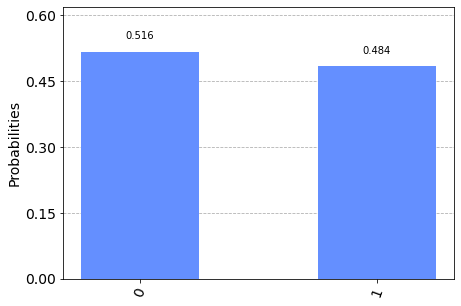

In [5]:
# Now we made a circuit, and used a gate, how do we know if it worked?
# we Measure it! 

our_first_quantum_circuit.measure(0,0) # this measures our first qubit

# Notice how I have two inputs for measurement, the first input 
# is the qubit we want to measure and the second is the classical bit
# we want to store the measurement in

# execute our measurement 1000 times
job=execute(our_first_quantum_circuit, M_simulator, shots=1000)

#get the results
counts=job.result().get_counts()

#plot them in a pretty histogram
plot_histogram(counts)


### Results!

These results should make sense to you! Remember, $$ H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)=|+\rangle$$

Now to explain the histogram, the simulator works by taking multiple measurements, think about it if you only take one measurement of $|+\rangle$ you are going to get only $|0\rangle$ or $|1\rangle$, to know that my qubit is actually in a superposition of these states we have to take multiple measuremetns or 'shots' as specified in the above code. 
In this case we specified 1000, the default is 1024 shots. 

In this case, seeing $|0\rangle$ and $|1\rangle$ about half the time in the histogram tells us that we are in either $|+\rangle$ or $|-\rangle$.



### Draw your circuit to see what you did! 

In [6]:
our_first_quantum_circuit.draw() # the draw method draws your circuit

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

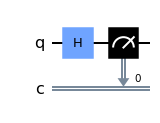

In [7]:
# if you use pip install matplotlib in command line you use 
# the matplotlib drawer to get really pretty circuits
our_first_quantum_circuit.draw(output='mpl') 